## Tim's Code:

In [28]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 12 11:23:05 2024

@author: HP
"""

import random

#first initialise the offspring distribution (zeta): p_0, p_1, ... p_k
def zeta_unspecified(randweight=10, tolerance=10**(-6)):
    T = 1
    p = []
    while T > 0:
        newp = random.random()/randweight
        if T >= newp:
            T = T - newp
            p.append(newp)
        else:
            p.append(T)
            T = 0
    assert(-tolerance <= sum(p) - 1 <= tolerance)
    return p


##########################################################################################

### a zeta where the expected number of children is 1, this is called a critical GW process

In [29]:
zeta_critical_example1 = [0.4, 0.3, 0.2, 0.1]
zeta_critical_example2 = [0.3, 0.4, 0.3]

### next we use the previous code to make a zeta and generate a GW tree of specified size n


In [30]:
def generate_GW(zeta, n):
    kidlist = [i for i in range(len(zeta))]
    edges = set()
    parent=0
    upper=1
    while upper <= n-1:
        [nchild] = random.choices(kidlist,weights=zeta, k=1)
        #print(nchild)
        for _ in range(nchild):
            edges.add((parent, upper))
            upper += 1
            #print(edges)
            if upper >= n:
                return (n, edges)
        if parent+1 >= upper:
            return (n, edges)
        parent += 1


## Time to plot the generated trees:

### Set the parameters for the plotting:

In [31]:
n = 10  
zeta = [0.4, 0.3, 0.2, 0.1]  

nodes, edges = generate_GW(zeta, n)
print(f'Tree with {nodes} nodes:')
print('Edges:', edges)

Tree with 10 nodes:
Edges: {(0, 1), (2, 4), (6, 8), (0, 3), (7, 9), (6, 7), (0, 2), (5, 6), (3, 5)}


### Function to plot the trees:

In [32]:
import matplotlib.pyplot as plt

def plot_tree(edges):
    def get_positions(node, depth=0, pos={}, x=0, dx=1):
        if node not in pos:
            pos[node] = (x, -depth)
            children = [v for u, v in edges if u == node]
            if children:
                dx = dx / len(children)
                next_x = x - dx * (len(children) - 1) / 2
                for i, child in enumerate(children):
                    pos = get_positions(child, depth + 1, pos, next_x + i * dx, dx)
        return pos
    
    def draw_tree(ax, edges, pos):
        for u, v in edges:
            x_values = [pos[u][0], pos[v][0]]
            y_values = [pos[u][1], pos[v][1]]
            ax.plot(x_values, y_values, 'gray')
        
        for node, (x, y) in pos.items():
            ax.scatter(x, y, c='skyblue', s=100)
            ax.text(x, y, str(node), fontsize=12, ha='center', va='center', color='black')
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.set_axis_off()

    root = 0
    pos = get_positions(root)
    draw_tree(ax, edges, pos)

    plt.show()

## Plot here!

Tree with 8 nodes:
Edges: {(0, 1), (2, 4), (0, 2), (5, 6), (1, 3), (3, 5)}


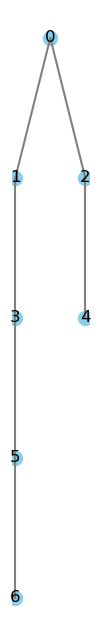

In [59]:
n = 8
zeta = [0.4, 0.3, 0.2, 0.1] 

nodes, edges = generate_GW(zeta, n)
print(f'Tree with {nodes} nodes:')
print('Edges:', edges)

plot_tree(edges)